In [1]:
import keras

#### Data

In [2]:
data = keras.datasets.mnist.load_data()

In [3]:
(x_train,y_train),(x_test,y_test) = data

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
import numpy as np

In [7]:
np.expand_dims(x_train, axis=-1).shape

(60000, 28, 28, 1)

In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
x_tarain = x_train.astype(np.float32) / 255.0

In [10]:
x_test = x_test.astype(np.float32) / 255.0

In [11]:
x_train[0,:,:]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
y_train[0]

np.uint8(5)

In [15]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Model Building
##### We perform model building using sequential model building, function and subclassing

- Sequential Model Building


In [17]:
from keras import layers

In [18]:
seq_model=keras.Sequential() # we create a model instance

In [19]:
x_train.shape[1:]

(28, 28, 1)

In [20]:
#input_shape=(28,28,1)
#seq_model.add(layers.Input(input_shape))

In [21]:
input_shape=x_train.shape[1:]
seq_model.add(layers.Input(input_shape))

In [22]:
seq_model.add(layers.Conv2D(8, (3,3), activation='relu',name = "Conv2d_1")) # input value ra 0 ko bich ko max value dinchaa

In [23]:
seq_model.add(layers.MaxPooling2D((2,2), name="Max_Pooling_2d_1"))

In [24]:
seq_model.add(layers.Conv2D(16,3, name = "Conv2d_2"))
seq_model.add(layers.Activation('relu', name = "Activation_1"))
seq_model.add(layers.MaxPooling2D(2, name = "Max_pooling_2d_2"))

In [25]:
seq_model.add(layers.Flatten(name = "Flatten_1"))

In [26]:
seq_model.add(layers.Dropout(0.3))

In [27]:
seq_model.add(layers.Dense(524, activation='relu', name='First_Desnse_Layer'))

In [28]:
seq_model.add(layers.Dense(10, activation='softmax', name='Output_Layer'))

In [29]:
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2d_1 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation_1 (Activation)       │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_pooling_2d_2 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ First_Desnse_Layer (Dense)      │ (None, 524)            │       210,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         5,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,622 (846.18 KB)

 Trainable params: 216,622 (846.18 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
seq_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
import tensorflow as tf

In [32]:
#seq_model.fit(x_train, y_train, validation_split=0.1, batch_size=64, epochs=5)

In [33]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [34]:
history=seq_model.fit(x_train, y_train, validation_split=0.1, batch_size=64, epochs=35 ,callbacks=[early_stopping])

Epoch 1/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8111 - loss: 3.1489 - val_accuracy: 0.9732 - val_loss: 0.0936
Epoch 2/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9468 - loss: 0.1780 - val_accuracy: 0.9785 - val_loss: 0.0760
Epoch 3/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9626 - loss: 0.1197 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 4/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9707 - loss: 0.0927 - val_accuracy: 0.9823 - val_loss: 0.0666
Epoch 5/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9750 - loss: 0.0786 - val_accuracy: 0.9863 - val_loss: 0.0431
Epoch 6/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9783 - loss: 0.0703 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 7/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9802 - loss: 0.0623 - val_accuracy: 0.9847 - val_loss: 0.0483
Epoch 8/35
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9813 - loss: 0.0579 - val_accuracy: 0.

In [35]:
history.history

{'accuracy': [0.8892222046852112,
  0.950425922870636,
  0.9632592797279358,
  0.9696296453475952,
  0.9744259119033813,
  0.978518545627594,
  0.9800184965133667,
  0.9808333516120911,
  0.9820370078086853,
  0.9845740795135498,
  0.9847962856292725,
  0.987240731716156],
 'loss': [0.9291059970855713,
  0.16641266644001007,
  0.11869051307439804,
  0.09583141654729843,
  0.08220212161540985,
  0.06900160759687424,
  0.06268095225095749,
  0.061390675604343414,
  0.05517987161874771,
  0.04886316880583763,
  0.04835643246769905,
  0.042452212423086166],
 'val_accuracy': [0.9731666445732117,
  0.9785000085830688,
  0.9796666502952576,
  0.9823333621025085,
  0.9863333106040955,
  0.9866666793823242,
  0.984666645526886,
  0.9871666431427002,
  0.9893333315849304,
  0.9871666431427002,
  0.9886666536331177,
  0.9879999756813049],
 'val_loss': [0.09361813217401505,
  0.07604144513607025,
  0.07114782929420471,
  0.06656749546527863,
  0.04313754662871361,
  0.043450795114040375,
  0.04831

In [36]:
import matplotlib.pyplot as plt

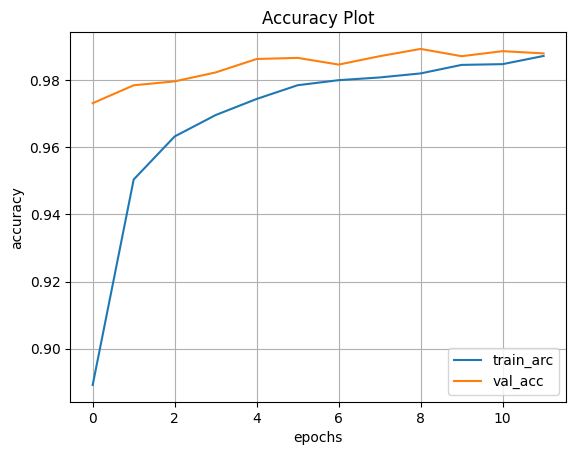

In [37]:
plt.plot(history.history['accuracy'],label='train_arc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.grid()
plt.show()

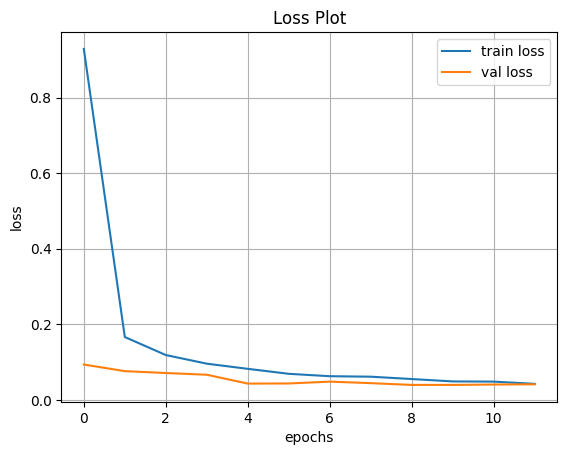

In [38]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Plot")
plt.legend()
plt.grid()
plt.show()

In [39]:
seq_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1537 - loss: 2.2984


[2.298278570175171, 0.13619999587535858]

In [40]:
preds=seq_model.predict(x_test,batch_size=100)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [41]:
import numpy as np

In [42]:
preds[0], np.argmax(preds[0])

(array([0.10490083, 0.10495365, 0.1028483 , 0.10602345, 0.09286917,
        0.09539695, 0.08936528, 0.10100773, 0.10106251, 0.10157212],
       dtype=float32),
 np.int64(3))

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [44]:
# sequential method initialized with list of layer
seq2_model=keras.Sequential([ 
    layers.Input(input_shape),
    layers.Conv2D(8, (3,3), activation='relu',name = "Conv2d_1"),
    layers.MaxPooling2D((2,2), name="Max_Pooling_2d_1"),
    layers.Conv2D(16,3, name = "Conv2d_2"),
    layers.Activation('relu', name = "Activation_1"),
    layers.MaxPooling2D(2, name = "Max_pooling_2d_2"),
    layers.Flatten(name="Flatten_1"),
    layers.Dropout(0.3),
    layers.Dense(524, activation='relu', name='First_Desnse_Layer'),
    layers.Dense(10, activation='softmax', name='Output_Layer')
    
])

In [45]:
#Functional method of building model
input_data=layers.Input(input_shape)
x=layers.Conv2D(8, (3,3), activation='relu',name = "Conv2d_1")(input_data)
x=layers.MaxPooling2D((2,2), name="Max_Pooling_2d_1")(x)
x=layers.Conv2D(16,3, name = "Conv2d_2")(x)
x=layers.Activation('relu', name = "Activation_1")(x)
x=layers.MaxPooling2D(2, name = "Max_pooling_2d_2")(x)
x=layers.Flatten(name="Flatten_1")(x)
x=layers.Dense(524, activation='relu', name='First_Desnse_Layer')(x)
output=layers.Dense(10, activation='softmax', name='Output_Layer')(x)

func_model=keras.Model(inputs=input_data, outputs=output, name="FuncModel")

In [46]:
func_model.summary()

Model: "FuncModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2d_1 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Activation_1 (Activation)       │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_pooling_2d_2 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ First_Desnse_Layer (Dense)      │ (None, 524)            │       210,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         5,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,622 (846.18 KB)

 Trainable params: 216,622 (846.18 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
keras.utils.plot_model(func_model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [48]:
input_data=layers.Input(input_shape)
x=layers.Conv2D(8, (3,3), activation='relu',name = "Conv2d_1")(input_data)
x=layers.MaxPooling2D((2,2), name="Max_Pooling_2d_1")(x)
x=layers.Flatten(name="Flatten_1")(x)
y=layers.Dropout(0.3)(x)
x_1=layers.Dense(524, activation='relu', name='First_Desnse_Layer')(x)
x_2=layers.Dense(524, activation='relu', name=('Second_Desnse_Layer'))(y)
x=layers.add([x_1,x_2])
output=layers.Dense(10, activation='softmax', name='Output_Layer')(x)

func2_model=keras.Model(inputs=input_data, outputs=output, name="FuncModel")
keras.utils.plot_model(func2_model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
#save model into disk
seq_model.save("seq_model.keras")

In [51]:
#load model from disk
loaded_model=keras.saving.load_model("seq_model.keras")